## Sales Trend Analysis

In [4]:
#Loading and Previewing Data

import pandas as pd
df = pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\Indolike\Sales Trend Analysis Dataset - Superstore.csv', encoding='latin1') 
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### # Checking for Missing Values

In [7]:
import pandas as pd
df = pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\Indolike\Sales Trend Analysis Dataset - Superstore.csv', encoding='latin1') 
df.head()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

-No missing values 

-Order Date and Ship Date are still in string format. That is fixed next.

### # Converting Date and Removing Uneccesary Columns


In [9]:
import pandas as pd
df = pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\Indolike\Sales Trend Analysis Dataset - Superstore.csv', encoding='latin1') 
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

### # Monthly Sales Trend

In [10]:
#Creating a new 'Month' column
df['Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()

#Converting Month to timestamp for plotting
monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()

### # Graph/Trend Plot

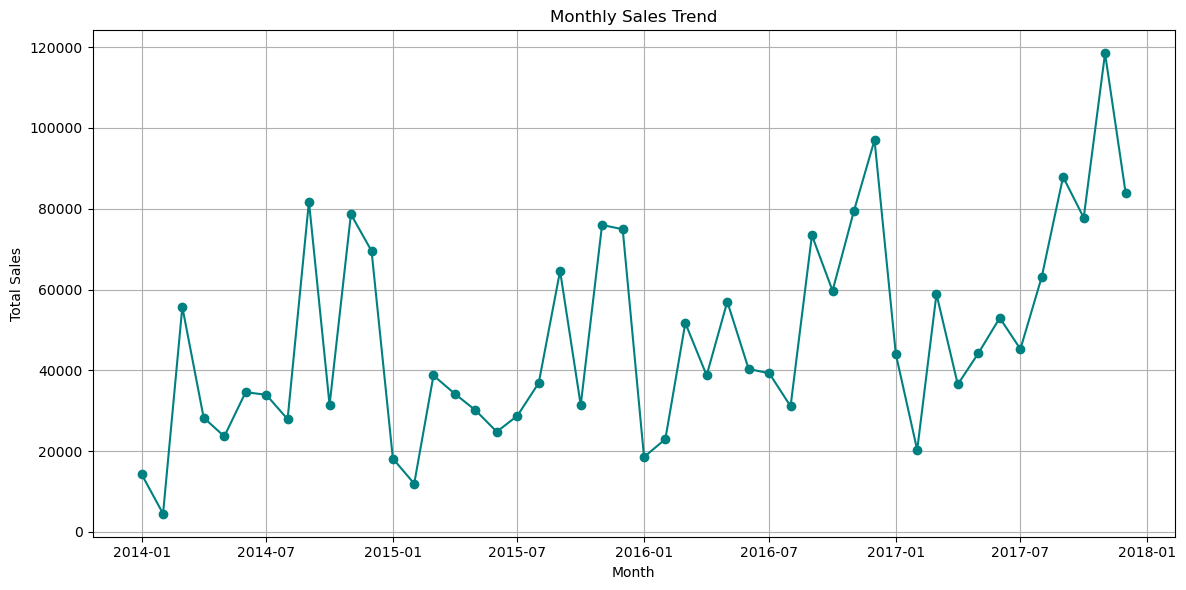

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month'], monthly_sales['Sales'], marker='o', color='teal')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

### # Best and Worst Month

In [12]:
best_month = monthly_sales.loc[monthly_sales['Sales'].idxmax()]
worst_month = monthly_sales.loc[monthly_sales['Sales'].idxmin()]

print("Best Month:")
print(best_month)

print("\n Worst Month:")
print(worst_month)

Best Month:
Month    2017-11-01 00:00:00
Sales             118447.825
Name: 46, dtype: object

 Worst Month:
Month    2014-02-01 00:00:00
Sales               4519.892
Name: 1, dtype: object


Conclusions:

- Sales increased steadily from 2014 to 2017, showing strong growth over time.

- The best-performing month was November 2017, with total sales of $118447.83

- The lowest-performing month was February 2014, with just $4519.89 in sales.